## Acquire the data and create our environment

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)


In [82]:
train = pd.read_csv('houses_dataset.csv')

In [83]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [84]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Explore the data and engineer Features

In [85]:
print(train.SalePrice.skew())

1.8828757597682129


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

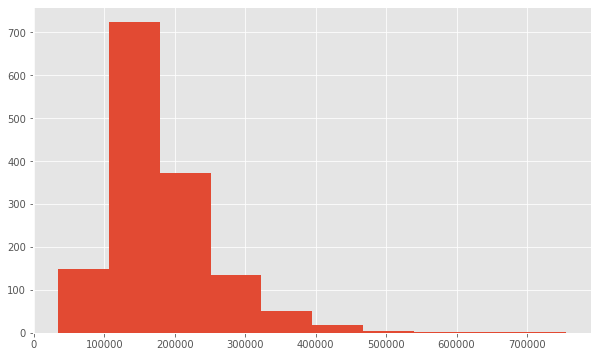

In [86]:
plt.hist(train.SalePrice)

In [87]:
target = np.log(train.SalePrice)

In [88]:
print('skew is', target.skew())

skew is 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

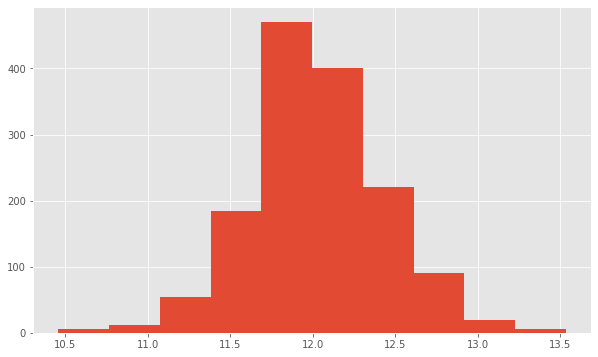

In [89]:
plt.hist(target)

## Correlation

In [90]:
numeric_features = train.select_dtypes(include=[np.number])

In [91]:
corr = numeric_features.corr()

In [92]:
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


## a. Delete all the outlier data for the GarageArea field (for the same data set in the use case: House Prices).
Plot GaurageArea field and SalePrice in scatter plot, then check which numbers 
are anomalies. 

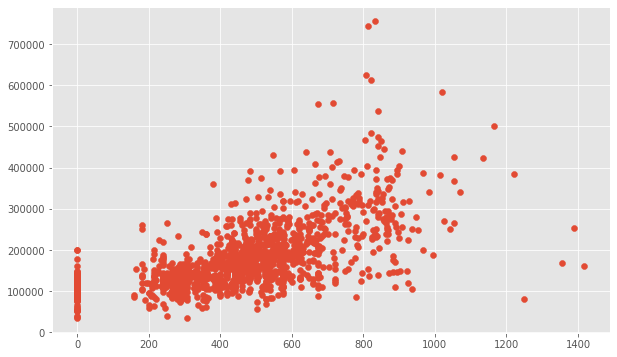

In [93]:
plt.scatter(train['GarageArea'],train['SalePrice'])

### delete process  - delete 0 and the values that are over 1200 of GarageArea 

In [94]:
train_new=train.drop(train[(train['GarageArea']<100) & (train['SalePrice']<210000)].index)

In [95]:
train_new=train_new.drop(train_new[(train_new['GarageArea']>1200) & (train_new['SalePrice']<300000)].index)

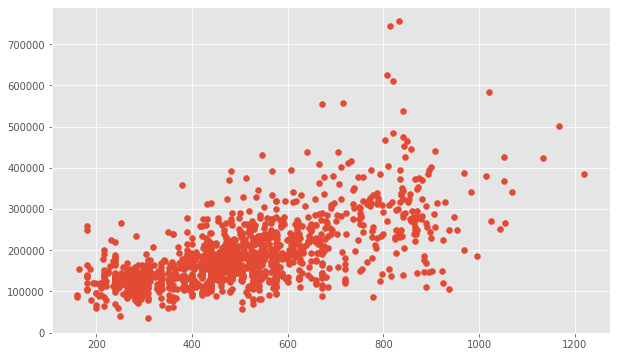

In [96]:
plt.scatter(train_new['GarageArea'],train_new['SalePrice'])


### b. Using simple regression select one feature that is positively correlated with ‘SalePrice’ create a regression model and plot the regression line between the two features.


Selected the overall quality feature to create the regression model with the sale price feature

In [97]:
quality_pivot = train_new.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

Plot the regression line

Text(0, 0.5, 'Median Sale Price')

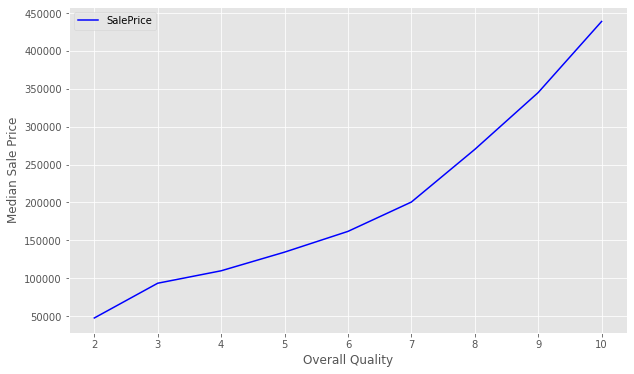

In [98]:
quality_pivot.plot(kind='line', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')

## c. Find top 5 most correlated features to the target label (SalePrice) and then build a model using those 5 features.


Get the numeric features of the train dataset

In [99]:
numeric_features = train.select_dtypes(include=[np.number])

Get the correlations of the features

In [100]:
corr = numeric_features.corr()

Display the top 5 correlated features for SalePrice feature

In [101]:
print("Most correleated")
print(corr['SalePrice'].sort_values(ascending=False)[1:6])

Most correleated
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


## Training a Linear Regression Model

### X and y arrays

Based on the correlations, save the columns to X and y datasets

In [102]:
X = train[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF']]
y = train['SalePrice']

## Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [103]:
from sklearn.model_selection import train_test_split

Use the train_test_split method to get x and y train and test sets

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and Training the Model

Fit the linear regression model with the x and y train data

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
lm = LinearRegression()

In [107]:
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [108]:
print(lm.intercept_)

-105399.48443512828


In [109]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,23072.500133
GrLivArea,47.727417
GarageCars,7385.124293
GarageArea,41.391684
TotalBsmtSF,38.466905


### Predictions from our Model

In [110]:
predictions = lm.predict(X_test)

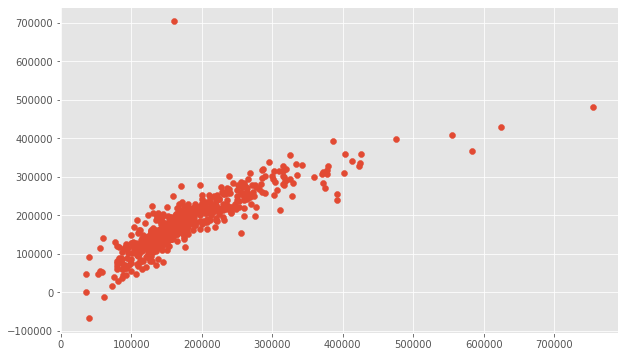

In [111]:
plt.scatter(y_test,predictions)

#### Residual Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


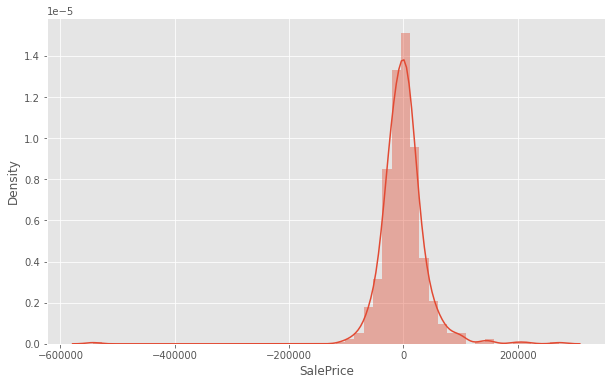

In [112]:
sns.distplot((y_test-predictions),bins=50);

## d. Apply PCA on the same dataset then apply regression model on the PCA result and report your observation after you evaluate the model

In [113]:
from sklearn.preprocessing import StandardScaler

### Apply PCA on the dataset

In [114]:
from sklearn.decomposition import PCA

# Instantiate the model with hyperparameters
pca = PCA(n_components=2)

# Fit to data and transform. Notice y is not specified!
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA_1', 'PCA_2'])

### Apply regression model on the PCA result

Create the x and y train and test datasets

In [115]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(principalDf, y, test_size=0.4, random_state=101)

Fit the linear regression model

In [116]:
lm.fit(X_train2,y_train2)

LinearRegression()

Get the preditions for the model

In [117]:
predictions2 = lm.predict(X_test2)

Plot the scatter plot of the y test and the predictions

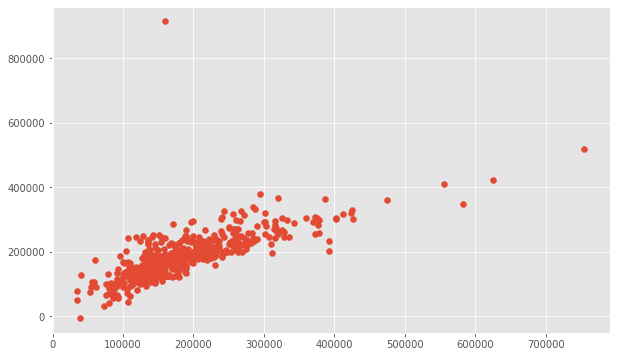

In [118]:
plt.scatter(y_test2,predictions2)

Plot the residual histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


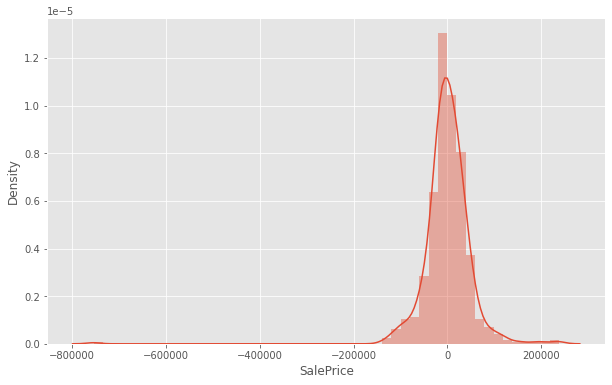

In [119]:
sns.distplot((y_test2-predictions2),bins=50);

Comparing the model with the original model, the scatter plot appears to be slightly more linear compared to the original, which has a slightly parabolic curve shape. Also, with the histograms, there are some slight differences on how the data is presented, but the curve is more or less the same. On the right side of the orignial histogram, there does appear to be some fluctuation, whereas, there is only a little fluctuation on the right side. 

## e. Evaluate all the models using MAE, MSE, RMSE and R2 score

### Regression Evaluation Metrics

In [120]:
from sklearn import metrics

Evaluation for the original model

In [121]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))


MAE: 25439.308259749818
MSE: 1807226569.9161925
RMSE: 42511.48750533428
R2: 0.7145451438487231


Evaluation for the PCA model

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))
print('R2:', metrics.r2_score(y_test2, predictions2))

MAE: 31547.519480748262
MSE: 2836165136.9348807
RMSE: 53255.658262149766
R2: 0.5520223503450613
